In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'Concrete_Data_Yeh.csv')

In [3]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
#Checking for null value
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
df.describe()    #Gives data distribution  ( mean and 50% data value checked 1st 2 columns and age looks not distributed normally)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<Axes: >

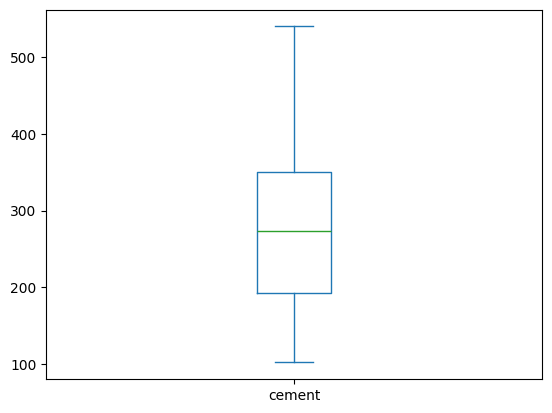

In [7]:
df['cement'].plot(kind='box')

<Axes: >

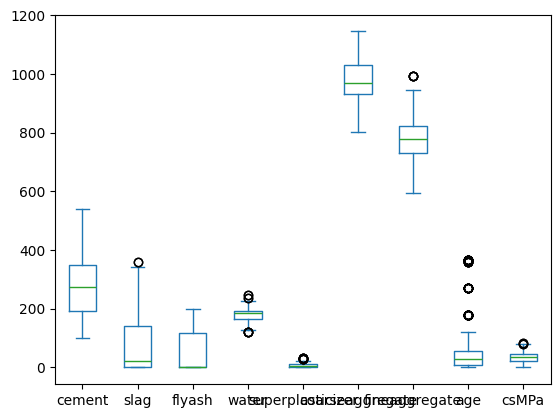

In [8]:
df.plot(kind='box')    # Here we check all data in one frame

<Axes: >

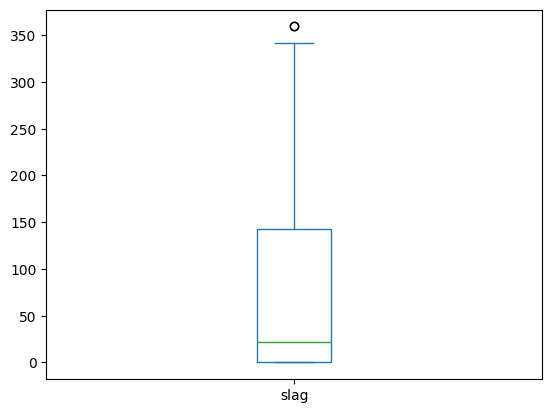

In [9]:
df['slag'].plot(kind='box')

<Axes: >

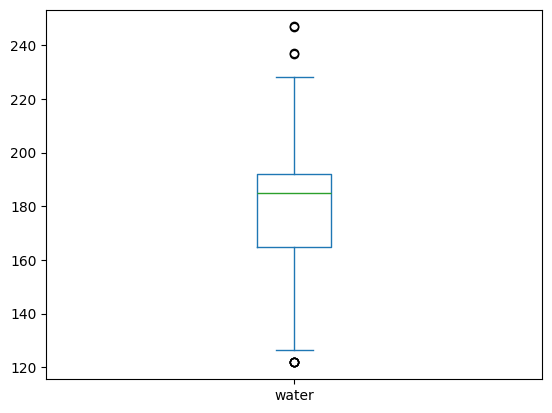

In [10]:
df['water'].plot(kind='box')

<Axes: ylabel='Frequency'>

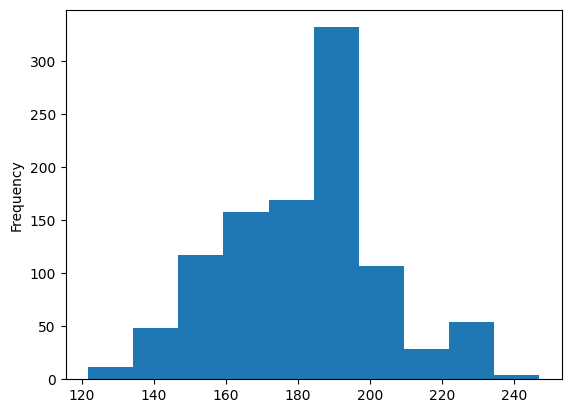

In [11]:
df['water'].plot(kind='hist')

<Axes: >

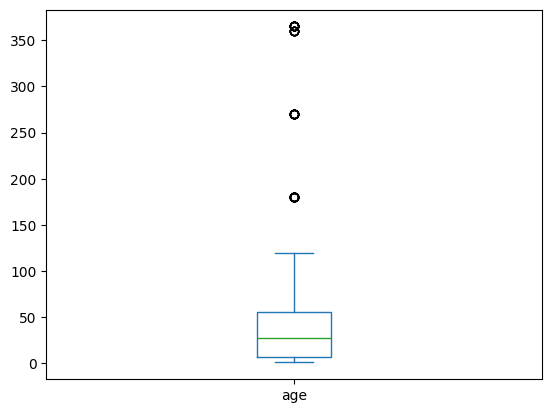

In [12]:
df['age'].plot(kind='box')

In [13]:
df['age'].quantile (0.85)    #Quantile to check the data at particular percantile # Here we are making age data to be make normalise  we are checking % values 95% data

90.0

In [14]:
new_df=df[df['age']<df['age'].quantile (0.85)]    #Here we are showing data below 90 as data below 90 is distributed equally

<Axes: >

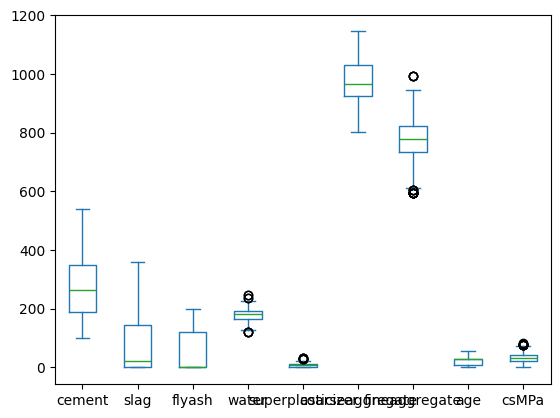

In [15]:
new_df.plot(kind='box')

In [16]:
np.corrcoef(df['age'],df['csMPa'])        #Here we are checking wheteher value are 1,0,-1   how much value deviated; here we consider it as approx. 0

array([[1.      , 0.328873],
       [0.328873, 1.      ]])

In [17]:
new_df=df[df['csMPa']<=df['csMPa'].quantile(0.97)]

<Axes: >

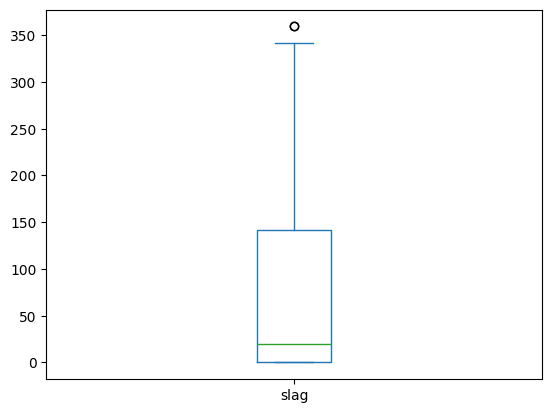

In [18]:
new_df['slag'].plot(kind='box')

In [19]:
new_df['slag'].quantile(0.995)

316.1

In [20]:
new_df=new_df[new_df['slag']<=316.1]

<Axes: >

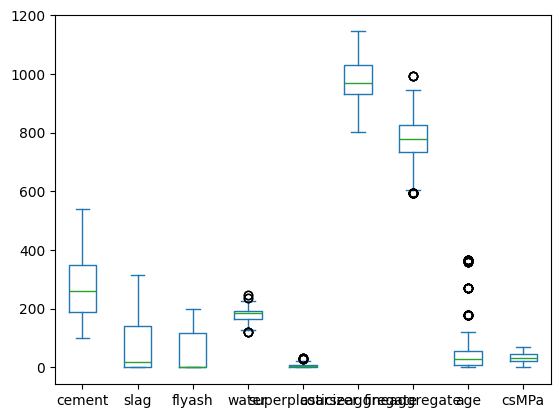

In [21]:
new_df.plot.box()

<Axes: >

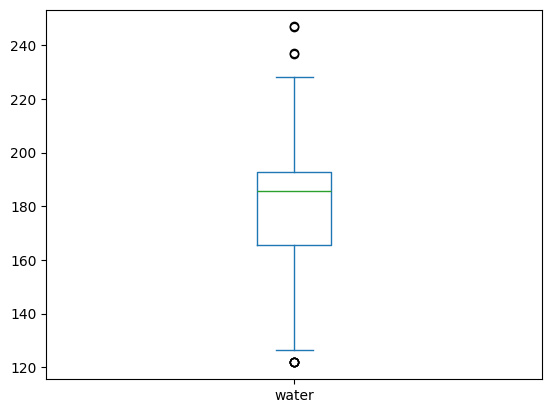

In [22]:
new_df['water'].plot.box()

In [23]:
new_df['water'].quantile(0.95)

228.0

In [24]:
new_df=new_df[new_df['water']<new_df['water'].quantile(0.95)]

<Axes: >

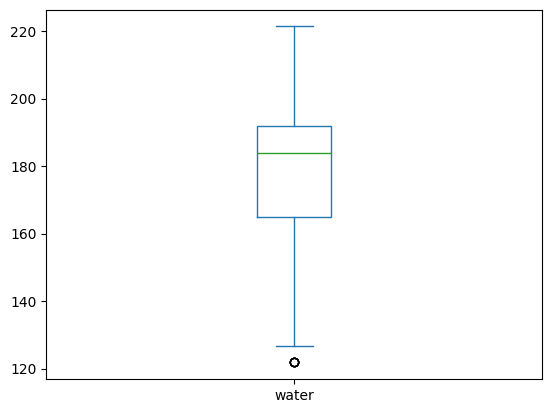

In [25]:
new_df['water'].plot.box()

In [26]:
new_df['water'].quantile(0.015)

137.8

In [27]:
new_df=new_df[new_df['water']>=new_df['water'].quantile(0.015)]

<Axes: >

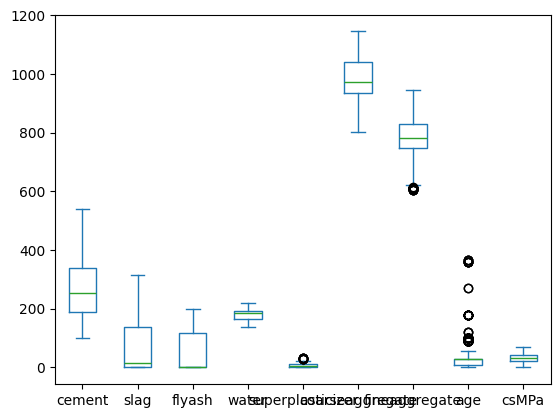

In [28]:
new_df.plot.box()

In [29]:
new_df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

<Axes: >

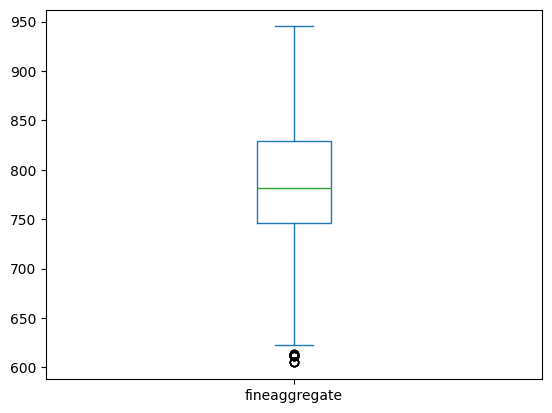

In [30]:
new_df['fineaggregate'].plot.box()

In [31]:
new_df['fineaggregate'].quantile(0.05)

636.4

In [33]:
new_df['fineaggregate'].corr(new_df['csMPa'])

-0.15393916035599767

In [34]:
new_df.drop ('age', axis=1, inplace=True)

In [35]:
new_df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,csMPa
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,61.89
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,44.30
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,38.07
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.02
16,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,39.36


In [36]:
X=new_df.drop('csMPa', axis=1)

In [38]:
y=new_df['csMPa']

In [39]:
X.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5
16,139.6,209.4,0.0,192.0,0.0,1047.0,806.9


In [40]:
y.head()

1     61.89
4     44.30
10    38.07
11    28.02
16    39.36
Name: csMPa, dtype: float64

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler=StandardScaler()

In [49]:
X=scaler.fit_transform(X)

In [50]:
X

array([[ 2.56814206, -0.81439666, -0.90857502, ..., -0.66086319,
         0.99637754, -1.4716985 ],
       [-0.7377474 ,  0.75187127, -0.90857502, ..., -1.08852406,
         0.02120052,  0.59484672],
       [-0.7377474 ,  0.75187127, -0.90857502, ..., -1.08852406,
         0.02120052,  0.59484672],
       ...,
       [-1.22288232,  0.83468   ,  0.7807572 , ..., -0.04503153,
        -1.07364575, -0.03410183],
       [-1.120239  ,  1.3942304 , -0.90857502, ...,  0.84450308,
         0.16378515,  0.08892327],
       [-0.13447583,  0.37450007,  0.30942418, ...,  0.38262934,
        -1.42883425, -0.28982816]])

In [52]:
X.shape

(925, 7)

In [53]:
y.shape

(925,)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=45)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr=LinearRegression()

In [58]:
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred= lr.predict(X_test)

In [60]:
from sklearn.metrics import r2_score,mean_squared_error

In [62]:
r2=r2_score(y_test,y_pred)

In [63]:
mean_squared_error(y_test,y_pred)

123.39933196227597

In [64]:
adj_r2=1-(((1-r2)*(len(X_test)-1))/(len(X_test)-7-1))

In [65]:
adj_r2

0.5076493295702867

In [66]:
r2

0.5263800615975041